### Load libraries

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Configure defaults

In [2]:
options(repr.plot.width = 14, repr.plot.height = 6) # set plot size

### Load data

The dataset is about direct marketing campaigns by phone calls of a Portuguese banking institution. There are demographic, transaction as well as interaction data contained in the dataset. The columns of csv data file are namely
- demographic data
    - age : customer age
    - job : type of customer job
    - marital : customer marital status
    - education : customer education level
    - default : does customer has credit in default
    - housing : does customer has housing loan
    - loan : does customer has personal loan
    - balance : customer balance
- interaction data
    - contact : contact method
    - month : last contact month
    - day : last contact day of the week
    - duration : last contact duration, in seconds
    - campaign : number of contacts performed during this campaign and for the client
    - pdays : number of days passed by after the client was last contacted from a previous campaign
    - previous : number of contacts performed before this campaign and for the client
    - poutcome : outcome of the previous marketing campaign
- transaction data
    - y : has the client subscribed to term deposit

In [3]:
data <- read.csv('~/Downloads/bank-data.csv', sep = ';')
head(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


### Summary
Firstly, we will convert string columns into categories then print the structure and summary of data to have better understanding

In [4]:
data <- data %>% mutate_if(is.character, as.factor)
str(data) # print structure of data

'data.frame':	45211 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0

**Observation** 
- There are 45211 observations and 17 columns in the dataset of which 10 columns are categorical

In [5]:
summary(data)

      age                 job           marital          education    
 Min.   :18.00   blue-collar:9732   divorced: 5207   primary  : 6851  
 1st Qu.:33.00   management :9458   married :27214   secondary:23202  
 Median :39.00   technician :7597   single  :12790   tertiary :13301  
 Mean   :40.94   admin.     :5171                    unknown  : 1857  
 3rd Qu.:48.00   services   :4154                                     
 Max.   :95.00   retired    :2264                                     
                 (Other)    :6835                                     
 default        balance       housing      loan            contact     
 no :44396   Min.   : -8019   no :20081   no :37967   cellular :29285  
 yes:  815   1st Qu.:    72   yes:25130   yes: 7244   telephone: 2906  
             Median :   448                           unknown  :13020  
             Mean   :  1362                                            
             3rd Qu.:  1428                                            


**Observation**
- Only 25 percent of the clients are older than 48
- Some of the clients are in debt which is known from negative balance value
- The numeric columns have outliers as the maximum column value(s) differ largely from majority of the values for that column

### Data visualization

`summarise()` has grouped output by 'loan', 'housing'. You can override using the `.groups` argument.


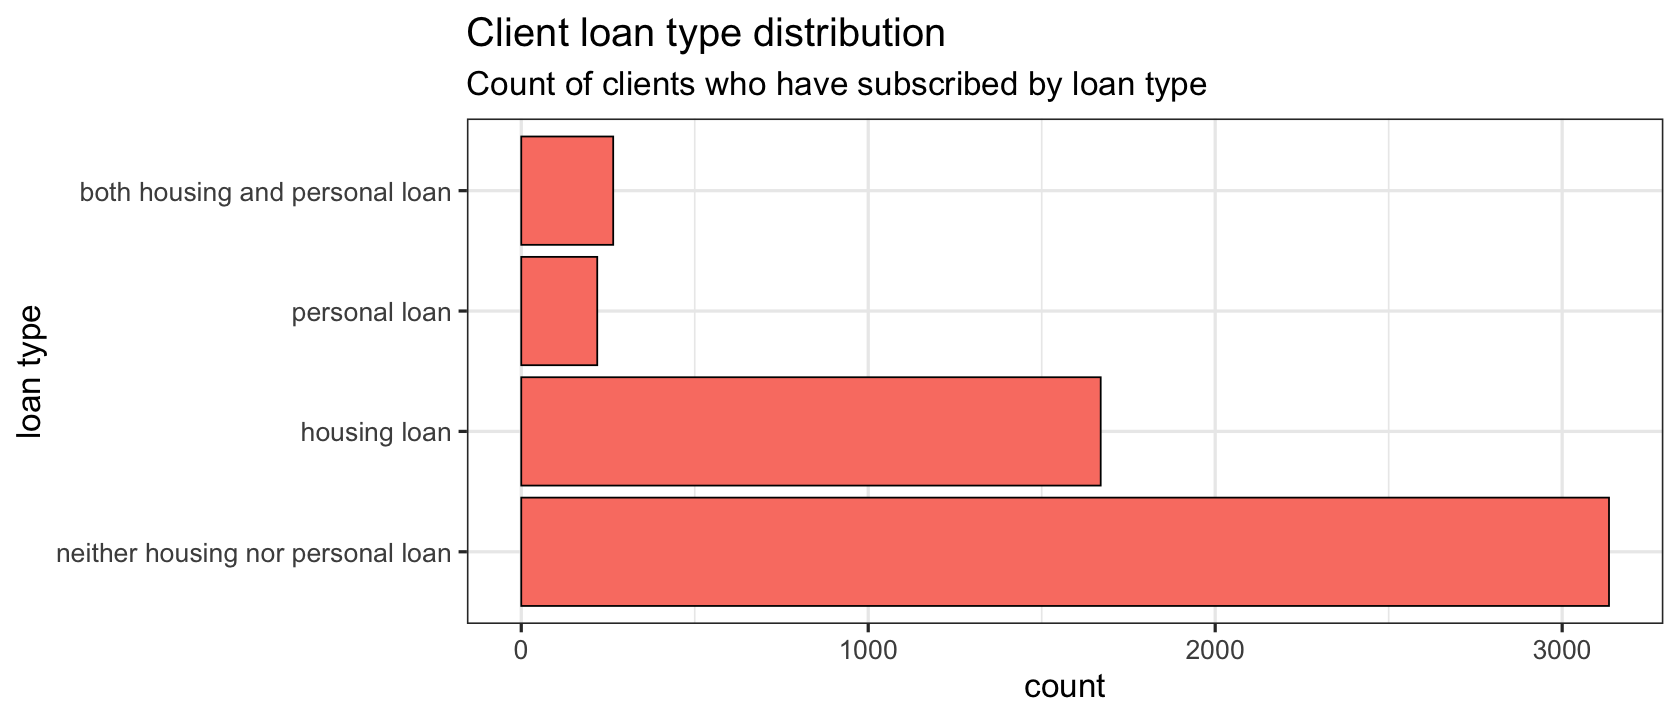

In [6]:
data %>%
filter(y == 'yes') %>%
group_by(loan, housing, y) %>% 
summarise(count = n()) %>%
mutate(
    status = case_when(
        housing == 'yes' & loan == 'yes' ~ 'both housing and personal loan',
        housing == 'no' & loan == 'no' ~ 'neither housing nor personal loan',
        housing == 'yes'  ~ 'housing loan',
        loan == 'yes' ~ 'personal loan'
        
    )
) %>%
mutate(status = factor(status)) %>% # not make ggplot auto sort
ggplot() +
geom_col(mapping = aes(x = status, y = count), colour = 'black', fill = 'salmon') +
xlab('loan type') +
ggtitle('Client loan type distribution', subtitle = 'Count of clients who have subscribed by loan type') +
coord_flip() +
theme_bw(base_size = 20)

**Observation**
- Luckily, over 3000 of subscribed customers (the largest group) have taken neither personal loan nor housing loan
- Nevertheless, term deposit termination can still occurr as there are above 40 percent of customers who have loans associated with them

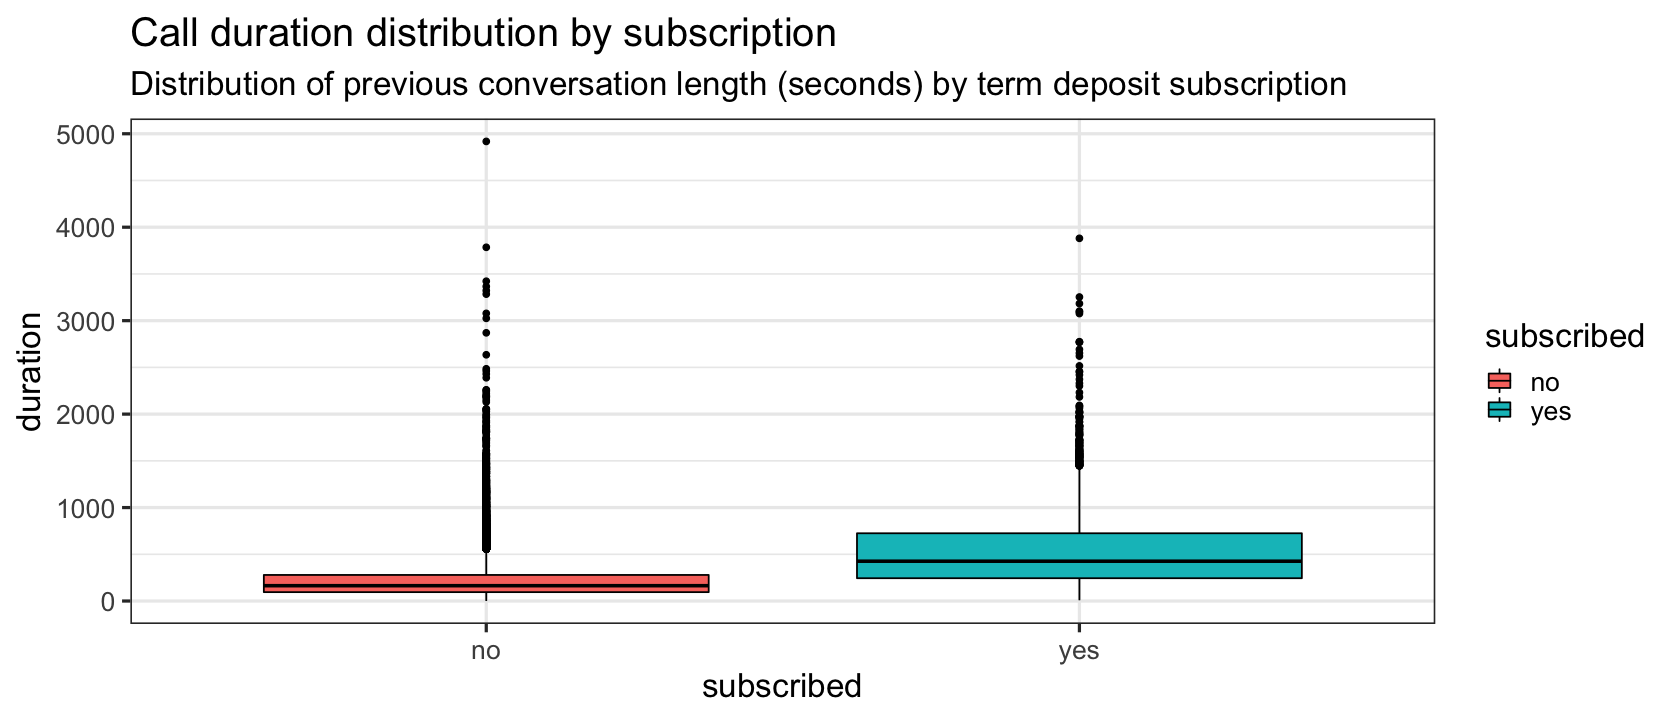

In [7]:
data %>% 
ggplot(mapping = aes(x = y, y = duration, fill = y)) + 
geom_boxplot(colour = 'black') + 
scale_fill_discrete(name = 'subscribed') +
xlab('subscribed') +
ggtitle('Call duration distribution by subscription', subtitle = 'Distribution of previous conversation length (seconds) by term deposit subscription') +
theme_bw(base_size = 20)

**Observation**
- Clients that have subscribed had longer conversation on the last call with bank
- Short calls could indicate that customers have already taken decision to not subscribe to the term deposit. In this case, bank should persuade to customers using better offers e.g. lower minimum deposit amount.

`summarise()` has grouped output by 'age_group'. You can override using the `.groups` argument.


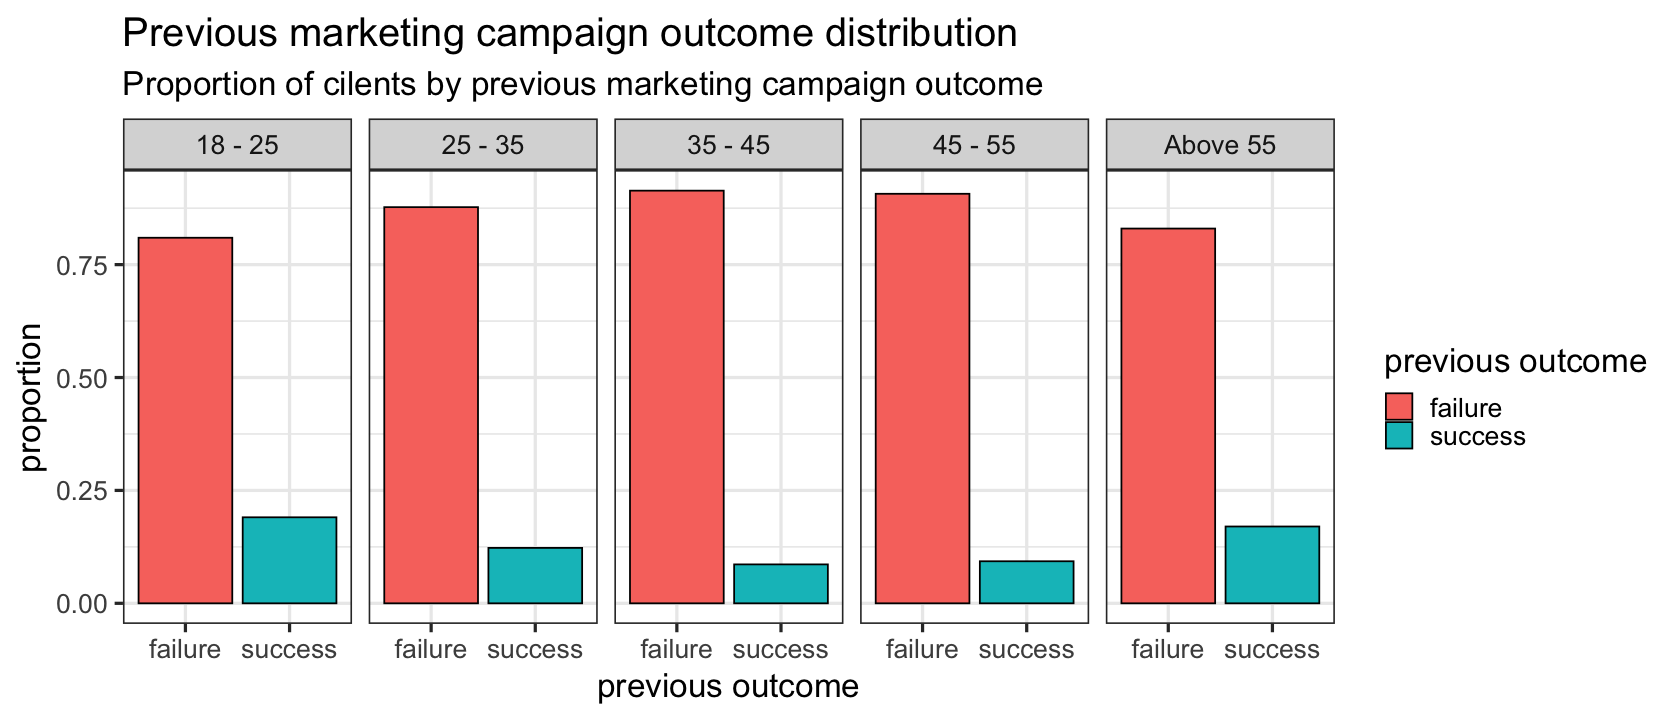

In [8]:
data %>%
filter(poutcome %in% c('success', 'failure') & y == 'no') %>%
mutate(
    age_group = case_when(
        age >= 18 & age < 25 ~ '18 - 25',
        age >= 25 & age < 35 ~ '25 - 35',
        age >= 35 & age < 45 ~ '35 - 45',
        age >= 45 & age < 55 ~ '45 - 55',
        age >= 55 ~ 'Above 55'
        
    )
) %>%
group_by(age_group, poutcome) %>%
summarise(count = n()) %>%
mutate(freq = count / sum(count)) %>%
ggplot(mapping = aes(x = poutcome, y = freq, fill = poutcome)) +
geom_col(colour = 'black') +
scale_fill_discrete(name = 'previous outcome') +
xlab('previous outcome') +
ylab('proportion') +
ggtitle(
    'Previous marketing campaign outcome distribution', 
    subtitle = 'Proportion of cilents by previous marketing campaign outcome'
) + 
facet_grid(. ~ age_group) +
theme_bw(base_size = 20)

**Observation**
- Bank faced failure in previous marketing campaign for majority of customers who did not subscribe
- Proportion of the customers with successful previous marketing campaign outcome is not neglectable especially for customers having age between 18 - 25 and elderly clients. As an alternative, bank could ask for opinions related to term deposit from clients to create personalized offers if possible.